# Import libraries

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [137]:
matplotlib.__version__

'3.8.0'

In [138]:
%matplotlib inline

# Import data

In [140]:
path = r'/Users/zoegyftopoulos/Documents/Data Projects/08-2024 World Happiness Report' 

In [141]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data.csv'))

In [142]:
df.head()

,Unnamed: 0,country,region,happiness_rank,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity,year
0,0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [143]:
df = df.drop(columns = 'Unnamed: 0')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             782 non-null    object 
 1   region              782 non-null    object 
 2   happiness_rank      782 non-null    int64  
 3   happiness_score     782 non-null    float64
 4   gdp_per_capita      782 non-null    float64
 5   family              782 non-null    float64
 6   health_life_exp     782 non-null    float64
 7   freedom             782 non-null    float64
 8   perc_of_corruption  781 non-null    float64
 9   generosity          782 non-null    float64
 10  year                782 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


# Exploring relationships

In [146]:
df.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'gdp_per_capita', 'family', 'health_life_exp', 'freedom',
       'perc_of_corruption', 'generosity', 'year'],
      dtype='object')

In [147]:
# Create a subset to explore relationships
sub = df[['happiness_score',
       'gdp_per_capita', 'family', 'health_life_exp', 'freedom',
       'perc_of_corruption', 'generosity']]

In [148]:
sub.corr()

,happiness_score,gdp_per_capita,family,health_life_exp,freedom,perc_of_corruption,generosity
happiness_score,1.000000,0.789284,0.648799,0.742456,0.551258,0.398418,0.137578
gdp_per_capita,0.789284,1.000000,0.585966,0.784338,0.340511,0.306307,-0.014560
family,0.648799,0.585966,1.000000,0.572650,0.420361,0.126401,-0.037262
health_life_exp,0.742456,0.784338,0.572650,1.000000,0.340745,0.250512,0.010638
freedom,0.551258,0.340511,0.420361,0.340745,1.000000,0.459593,0.290706
perc_of_corruption,0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920
generosity,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318920,1.000000


### Heatmaps

Text(0.5, 1.0, 'Correlation Matrix')

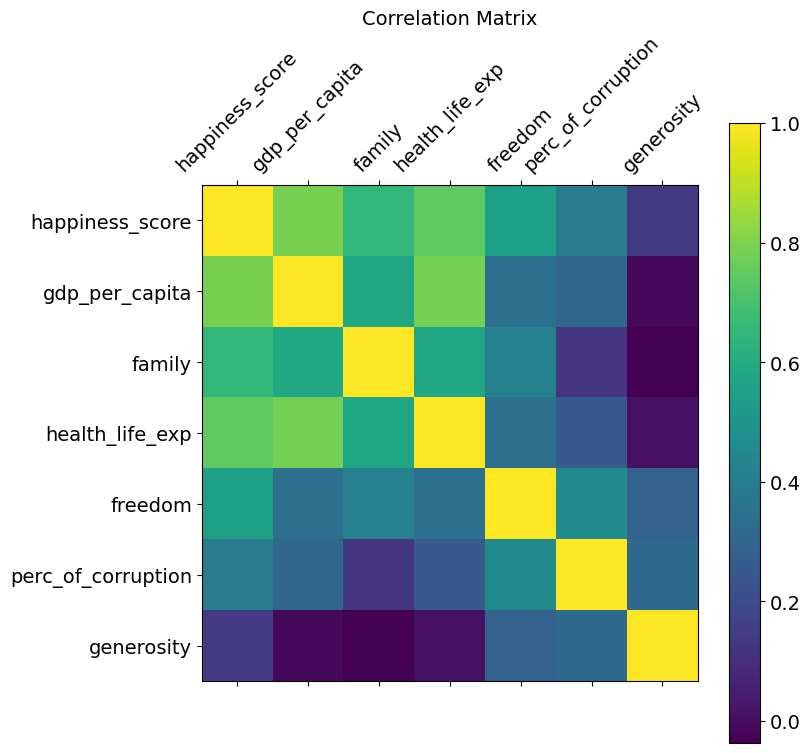

In [149]:
# Create a correlation heatmap using matplotlib
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend 
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

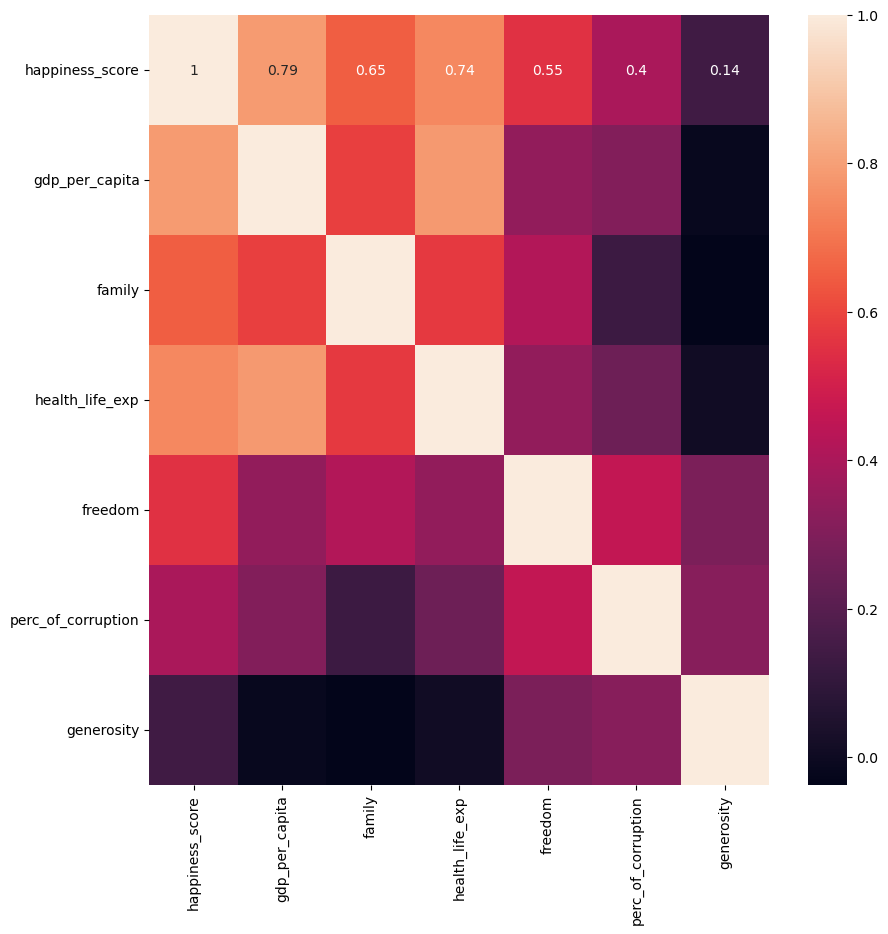

In [165]:
# Create a correlation heatmap using seaborn
# First, create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

Interesting correlations in this heatmap: 
The strongest correlation exists between gdp_per_capita and health_life_exp.
Strong correlations can also be found between happiness_score & gdp_per_capita as well as happiness_score & health_life_exp.
Medium correlations can be found between happiness_score & freedom, gdp_per_capita & family, health_life_exp & family, happiness_score & freedom. All of these are positive correlations. 

### Scatterplots

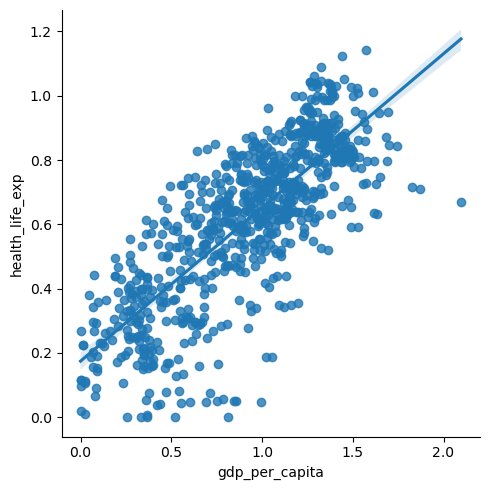

In [171]:
# Create a scatterplot for gdp_per_capita and health_life_exp
sns.lmplot(x = 'gdp_per_capita', y = 'health_life_exp', data = df)

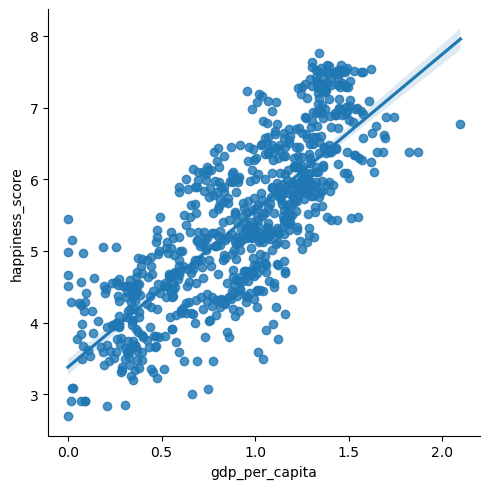

In [173]:
# Create a scatterplot for gdp_per_capita and happiness_score
sns.lmplot(x = 'gdp_per_capita', y = 'happiness_score', data = df)

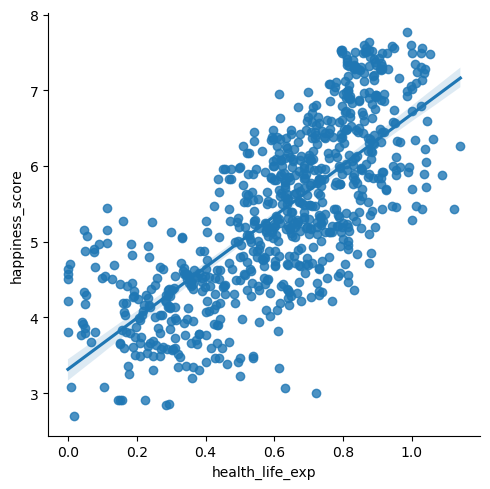

In [175]:
# Create a scatterplot for health_life_exp and happiness_score
sns.lmplot(x = 'health_life_exp', y = 'happiness_score', data = df)

The Happiness Score is most strongly correlated with GDP and health. That's why GDP and health are also strongly correlated. The scatter plots show a strong positive correlation between all these variables.

### Pair plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

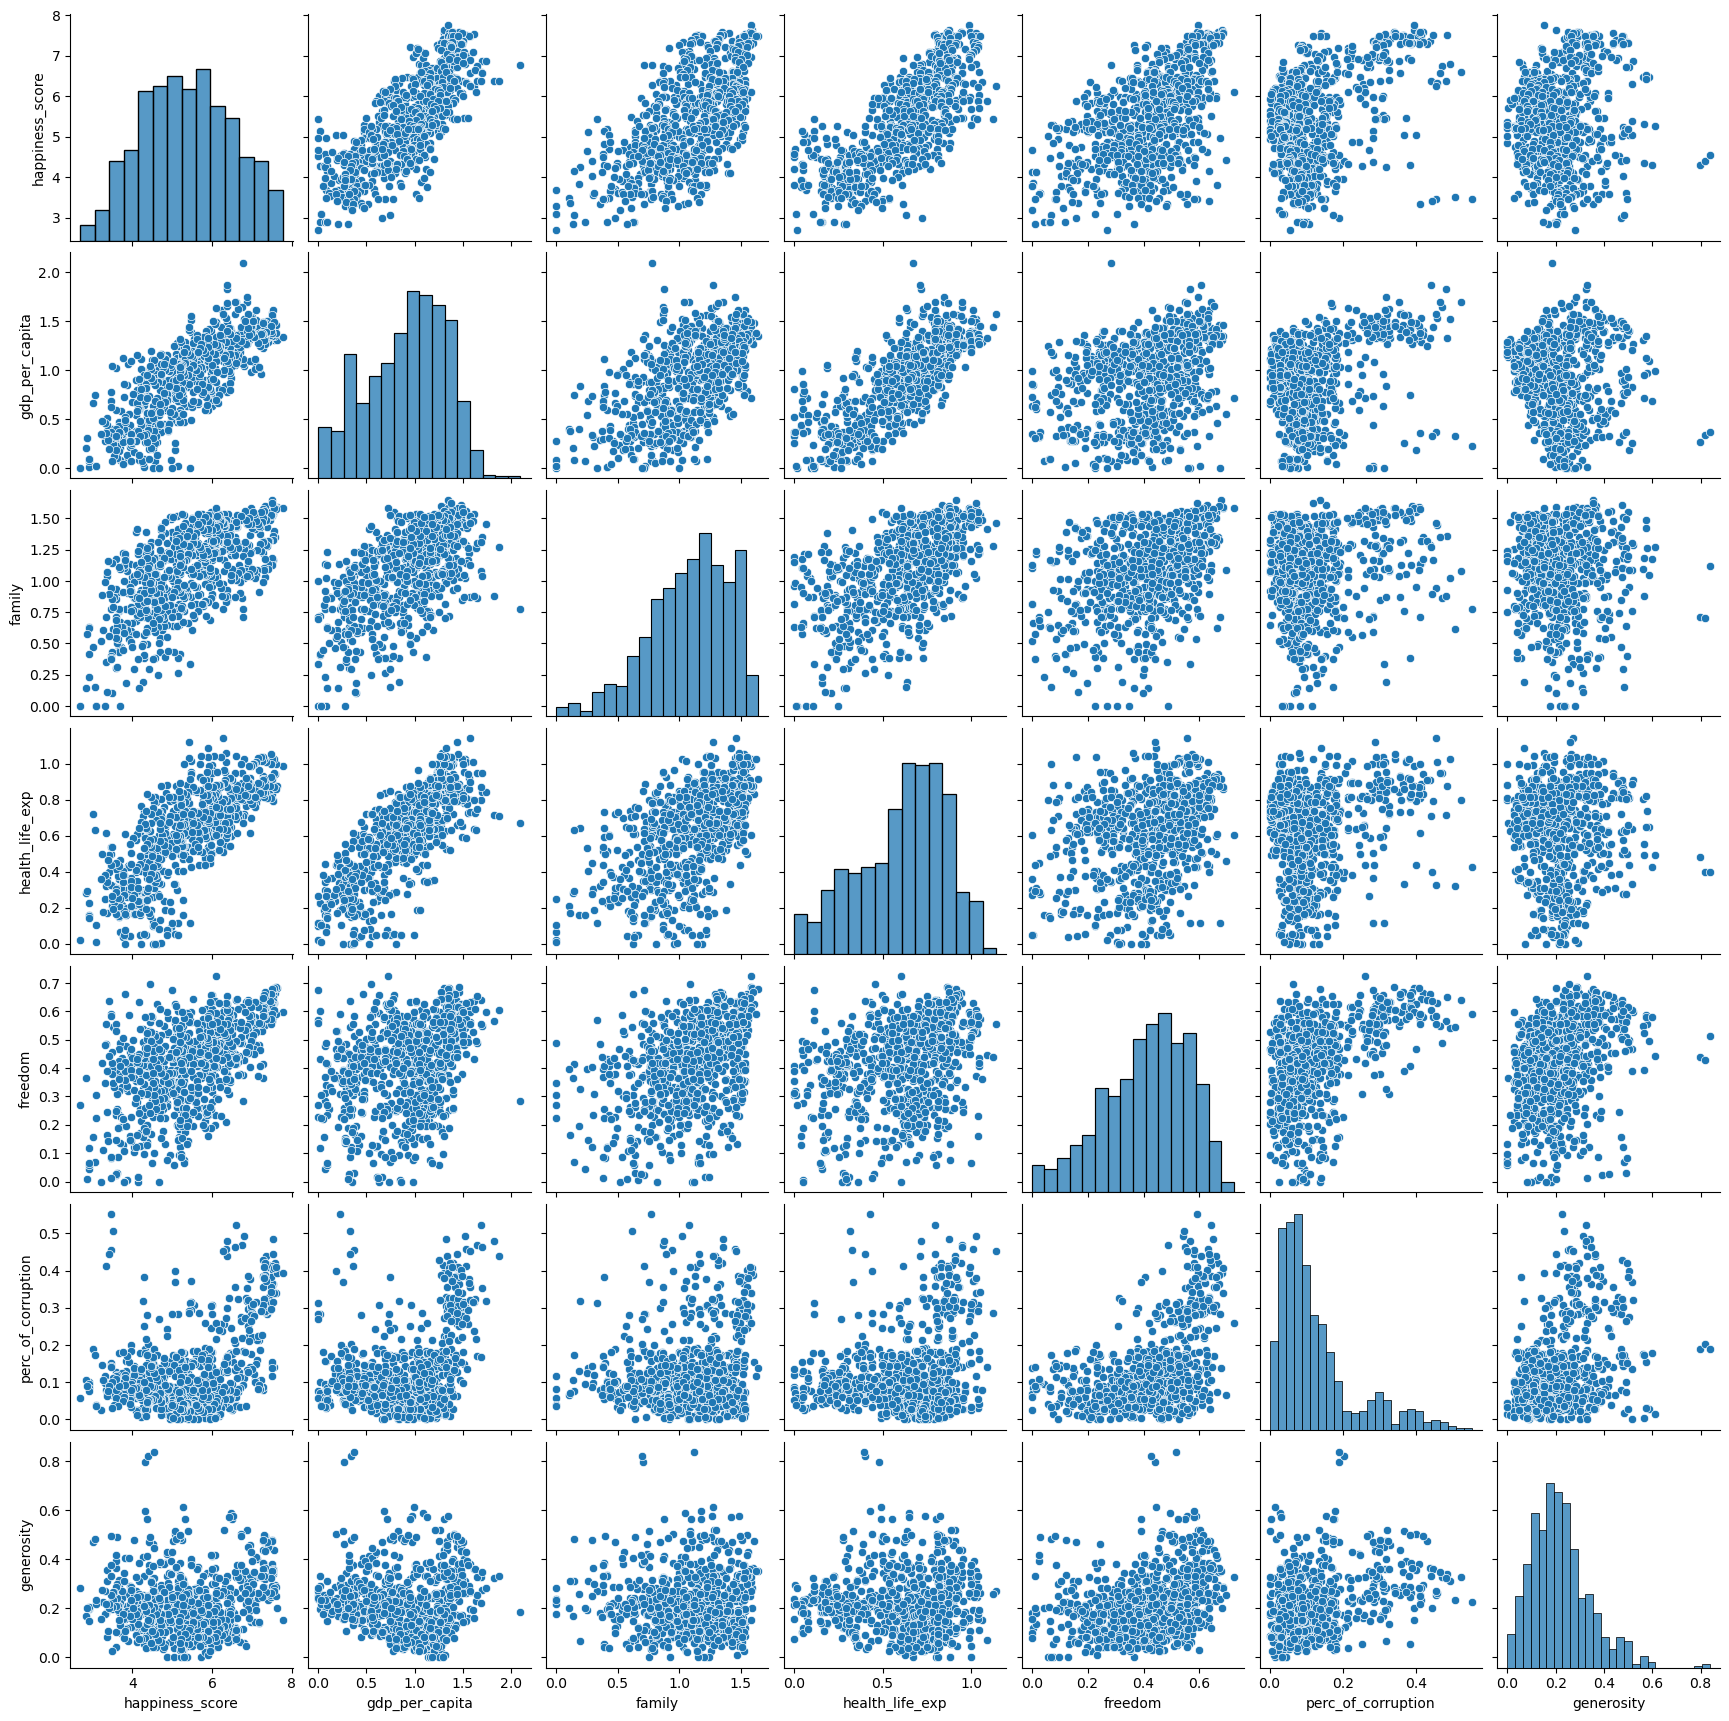

In [180]:
# Create a pair plot 
g = sns.pairplot(sub)

Other interesting correlations that I'd like to explore further are happiness_score & family and gdp_per_capita & family, as these also show moderately positive correlations. On the other hand, generosity and freedom seem to have weaker correlations with the other variables. 

### Categorical plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gdp_per_capita', ylabel='Count'>

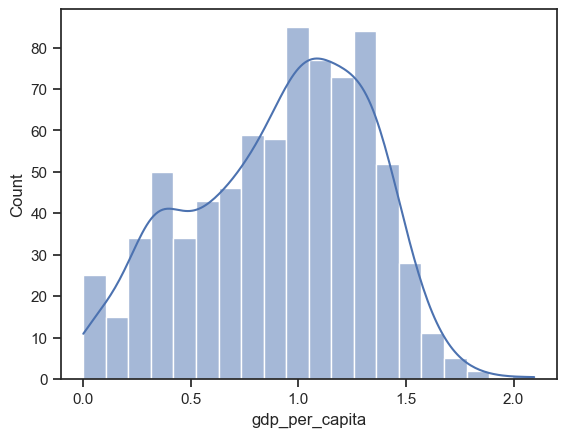

In [234]:
# Use a histogram to visualize the distribution of the variable gdp_per_capita
sns.histplot(df['gdp_per_capita'], bins = 20, kde = True)

In [235]:
# Create a gdp_category column
df.loc[df['gdp_per_capita'] < 0.5, 'gdp_category'] = 'Low GDP'

In [236]:
df.loc[(df['gdp_per_capita'] >= 0.5) & (df['gdp_per_capita'] < 1.4), 'gdp_category'] = 'Medium GDP'

In [237]:
df.loc[df['gdp_per_capita'] >= 1.4, 'gdp_category'] = 'High GDP'

In [238]:
df['gdp_category'].value_counts(dropna = False)

gdp_category
Medium GDP    552
Low GDP       153
High GDP       77
Name: count, dtype: int64

In [239]:
df.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'gdp_per_capita', 'family', 'health_life_exp', 'freedom',
       'perc_of_corruption', 'generosity', 'year', 'gdp_category',
       'happiness_category'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


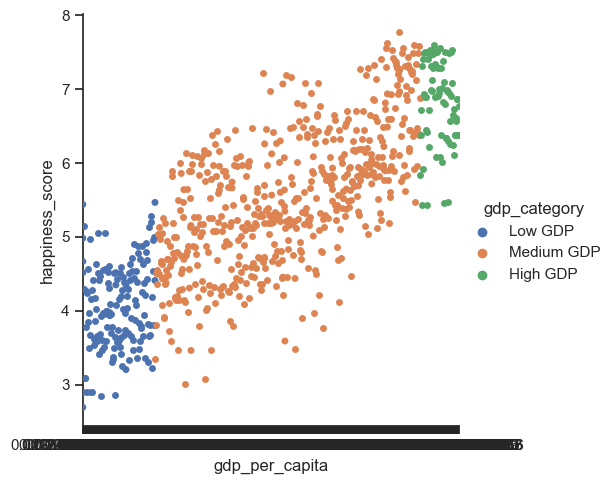

In [240]:
# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="gdp_per_capita", y="happiness_score", hue="gdp_category", data=df)

In [266]:
# fig = g.get_figure()
g.savefig("gdp_cat_hap.png") 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='happiness_score', ylabel='Count'>

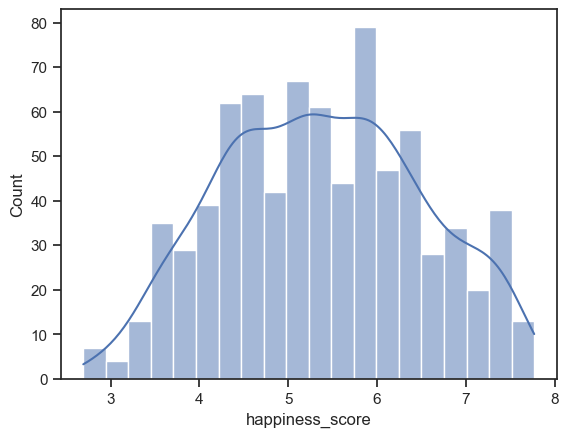

In [242]:
# Use a histogram to visualize the distribution of the variable happiness_score
sns.histplot(df['happiness_score'], bins = 20, kde = True)

In [243]:
# Create a happiness_category column
df.loc[df['happiness_score'] < 4.5, 'happiness_category'] = 'Low happiness'

In [244]:
df.loc[(df['happiness_score'] >= 4.5) & (df['happiness_score'] < 6.5), 'happiness_category'] = 'Medium happiness'

In [245]:
df.loc[df['happiness_score'] >= 6.5, 'happiness_category'] = 'High happiness'

In [246]:
df['gdp_category'].value_counts(dropna = False)

gdp_category
Medium GDP    552
Low GDP       153
High GDP       77
Name: count, dtype: int64

In [247]:
df.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'gdp_per_capita', 'family', 'health_life_exp', 'freedom',
       'perc_of_corruption', 'generosity', 'year', 'gdp_category',
       'happiness_category'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


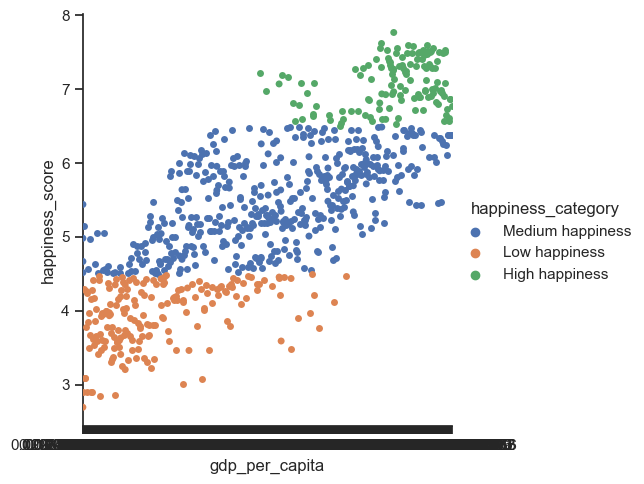

In [248]:
# Create a categorical plot in seaborn 
sns.set(style="ticks")
g_2 = sns.catplot(x="gdp_per_capita", y="happiness_score", hue="happiness_category", data=df)

In [268]:
# fig = g.get_figure()
g_2.savefig("gdp_hap_cat.png") 